<a href="https://colab.research.google.com/github/Coldman22/Coldman22/blob/main/Stock_Prices_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction

## Import the Libraries.

In [12]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
url="/content/Google_Stock_Price_Test.csv"
url="/content/Google_Stock_Price_Train.csv"

## Load the Training Dataset.

In [10]:
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


##  Use the Open Stock Price Column to Train Your Model.

In [13]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


## Normalizing the Dataset.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating X_train and y_train Data Structures.


In [15]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


## Reshape the Data.

In [16]:
X_trin = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1198, 60)

### Building the Model by Importing the crucial libraries and adding different layer to LSTM

In [17]:
pip install keras


## Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.


In [20]:

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import keras.models
import tensorflow

In [21]:

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True,input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

# fitting the Model

In [22]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 121ms/step - loss: 0.0462
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0041
Epoch 13/100

## Extracting the Actual Stock Prices of Jan-2017.

In [23]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

## Preparing the Input for the Model.


In [24]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

## Predicting the Values for Jan 2017 Stock Prices.

In [27]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

## Plotting the Actual and Predicted Prices for Google Stocks.

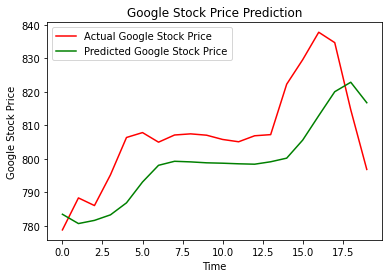

In [33]:
plt.plot(actual_stock_price, color='red', label="Actual Google Stock Price")
plt.plot(predicted_stock_price, color='green', label="Predicted Google Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

### Conclusion
The stock market plays a remarkable role in our daily lives. It is a significant factor in a country's GDP growth. In this tutorial, you learned the basics of the stock market and how to perform stock price prediction using machine learning. 

Do you have any questions related to this tutorial on stock prediction using machine learning? In case you do, then please put them in the comments section. Our team of experts will help you answer your questions. To learn more, watch this video: Stock Price Prediction.

If you are interested in learning further about Machine Learning, including the various ML applications across industries, do explore Simplilearn’s Post Graduate Program in AI and Machine Learning in partnership with Purdue University, and in collaboration with IBM. This comprehensive 12-month program covers everything from Statistics, Machine Learning, Deep Learning, Reinforcement Learning, to Natural Language Programming and more. You get to learn from global experts and at the end of the program walk away with great endorsements from industry and academic leaders and a skillet that is today the most in-demand in organizations across the world.